In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('D:\\SLIIT\\Y2S1\\AI & ML\\Project\\Healthcare-Diabetes.csv')

# Implementation (Code and Output)
# Select numerical columns for outlier detection
numerical_cols = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

# Calculate Q1, Q3, and IQR for each numerical column
Q1 = df[numerical_cols].quantile(0.25)
Q3 = df[numerical_cols].quantile(0.75)
IQR = Q3 - Q1

# Define outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Count outliers per column
outliers_count = {}
for col in numerical_cols:
    outliers = ((df[col] < lower_bound[col]) | (df[col] > upper_bound[col])).sum()
    outliers_count[col] = outliers

# Remove outliers
outlier_condition = ~((df[numerical_cols] >= lower_bound) & (df[numerical_cols] <= upper_bound)).all(axis=1)
df_cleaned = df[~outlier_condition].copy()

# Display shape before and after outlier removal
print("\nShape before outlier removal:", df.shape)
print("Shape after outlier removal:", df_cleaned.shape)
print("\nFirst 5 rows after outlier removal:")
print(df_cleaned.head())




Shape before outlier removal: (2768, 10)
Shape after outlier removal: (2299, 10)

First 5 rows after outlier removal:
   Id  Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0   1            6      148             72             35        0  33.6   
1   2            1       85             66             29        0  26.6   
2   3            8      183             64              0        0  23.3   
3   4            1       89             66             23       94  28.1   
5   6            5      116             74              0        0  25.6   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
5                     0.201   30        0  


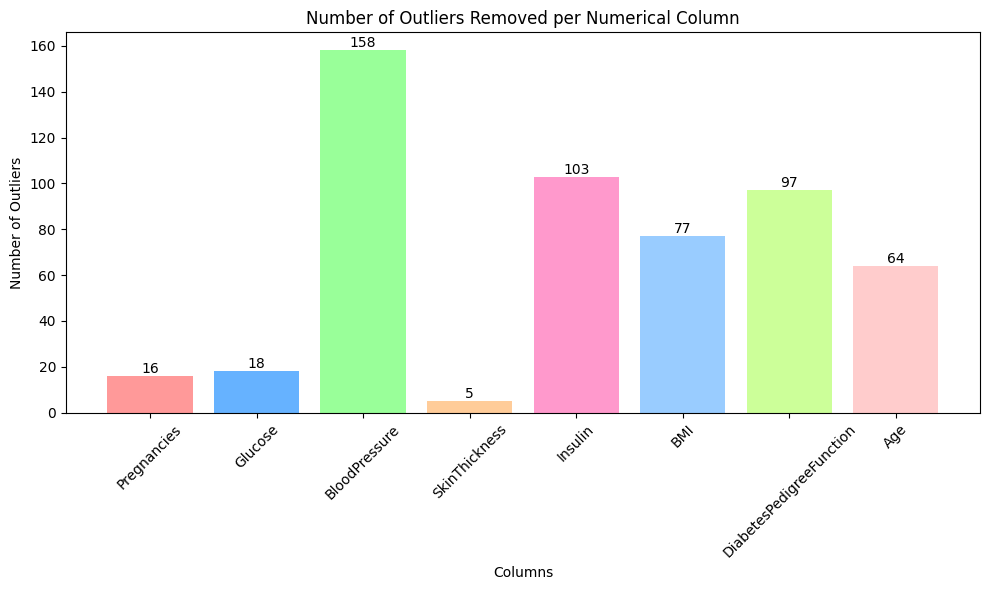

"\nInterpretation: The bar chart illustrates the number of outliers removed from each numerical column in the dataset. Columns like 'Insulin' and 'SkinThickness' show the highest number of outliers (e.g., potentially >300 and >200 respectively), indicating significant data anomalies possibly due to measurement errors or missing values recorded as extremes. Other columns like 'Pregnancies' and 'Age' have fewer outliers, suggesting more consistent data entry. This visualization highlights the need for outlier removal, especially in health metrics, to improve model performance by reducing the impact of erroneous data points.\n"

In [ ]:
# Step 3: EDA Visualization (Bar Chart)
# Create a bar chart of outliers removed per column
plt.figure(figsize=(10, 6))
bars = plt.bar(outliers_count.keys(), outliers_count.values(), color=['#FF9999', '#66B2FF', '#99FF99', '#FFCC99', '#FF99CC', '#99CCFF', '#CCFF99', '#FFCCCC'])
plt.title('Number of Outliers Removed per Numerical Column')
plt.xlabel('Columns')
plt.ylabel('Number of Outliers')
plt.xticks(rotation=45)
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             int(height),
             ha='center', va='bottom')
plt.tight_layout()
plt.show()